In [1]:
import cv2
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

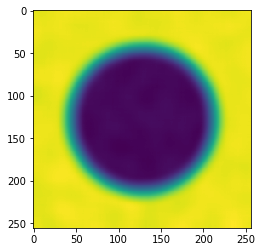

In [22]:
im = cv2.imread("noise.png", cv2.IMREAD_GRAYSCALE)
im = cv2.normalize(im.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
im = cv2.GaussianBlur(im, (31,31), 10)

grad_x = cv2.Sobel(im, cv2.CV_64F, 1, 0, 3)
grad_y = cv2.Sobel(im, cv2.CV_64F, 0, 1, 3)
grad_mag = np.sqrt(grad_x * grad_x + grad_y * grad_y)
grad_phase = np.arctan2(grad_y, grad_x)

plt.figure()
plt.imshow(im)

Construct initial contour. Important to have startpoint = endpoint to ensure the snake is closed

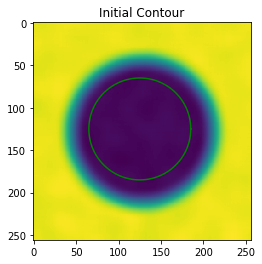

In [39]:
PI = 3.142
num = 100
x = 125+60*np.cos(np.linspace(0, 2*np.pi, num=num, endpoint=True))
y = 125+60*np.sin(np.linspace(0, 2*np.pi, num=num, endpoint=True))

plt.figure()
plt.title("Initial Contour")
plt.imshow(im)
plt.plot(x,y,'g')

Construct deformation matrix

In [24]:
alpha = 0.001;
beta = 0.4;
gamma = 100;
iterations = 50;

N = len(x);
a = gamma*(2*alpha+6*beta)+1;
b = gamma*(-alpha-4*beta);
c = gamma*beta;

P = np.diag(np.full(N,a));
P = P + np.diag(np.full(N-1,b),  1)[0:N,0:N] + np.diag(np.full(N,b), -N+1)[0:N,0:N]
P = P + np.diag(np.full(N-1,b), -1)[0:N,0:N] + np.diag(np.full(N,b),  N-1)[0:N,0:N]
P = P + np.diag(np.full(N-2,c),  2)[0:N,0:N] + np.diag([c,c], -N+2)[0:N,0:N]
P = P + np.diag(np.full(N-2,c), -2)[0:N,0:N] + np.diag([c,c],  N-2)[0:N,0:N]
P = np.linalg.inv(P)

Compute forces (gradient) on image

In [42]:
fex = np.zeros(shape=(N,1))
fey = np.zeros(shape=(N,1))

for ii in range(0,5):
    print(np.shape(x))
    
    # Calculate external force
    for i, (xx, yy) in enumerate(zip(x, y)):
    #print(bilinear_interpolate(xx, yy, grad_x[int(np.floor(yy)), int(np.floor(xx))], grad_x[int(np.floor(yy)), int(np.ceil(xx))], grad_x[int(np.ceil(yy)), int(np.floor(xx))], grad_x[int(np.ceil(yy)), int(np.ceil(xx))]))
        fex[i] = bilinear_interpolate(xx, yy, grad_x[int(np.floor(yy)), int(np.floor(xx))], grad_x[int(np.floor(yy)), int(np.ceil(xx))], grad_x[int(np.ceil(yy)), int(np.floor(xx))], grad_x[int(np.ceil(yy)), int(np.ceil(xx))])
        fey[i] = bilinear_interpolate(xx, yy, grad_y[int(np.floor(yy)), int(np.floor(xx))], grad_y[int(np.floor(yy)), int(np.ceil(xx))], grad_y[int(np.ceil(yy)), int(np.floor(xx))], grad_y[int(np.ceil(yy)), int(np.ceil(xx))])
    
    # Move control points
    x = P*(x+gamma*fex);
    y = P*(y+gamma*fey);
    
    #if(mod(ii,5)==0):
    #    plt.plot(x,y,'g')

#plt.plot(x,y,'g')

(100, 100)


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
def interp(x, x1, x2, fx1, fx2):
    return (x - x1)/(x2 - x1)*(fx2 - fx1) + fx1

interp(12.5, 10, 20, -100, 100)

In [28]:
def bilinear_interpolate(x, y, f_00, f_01, f_10, f_11):
    return f_00 * (np.ceil(x) - x) * (np.ceil(y) - y) + f_10 * (x - np.floor(x)) * (np.ceil(y) - y) + f_01 * (np.ceil(x) - x) * (y - np.floor(y)) + f_11 * (x - np.floor(x)) * (y - np.floor(y))

In [ ]:
import numpy as np
from numpy.linalg import inv

z = np.array([[1], [3], [5], [4]]) # pixel intensities
m = np.array([[0, 0 ,1],[1,0 ,1],[0 ,1 ,1],[1 ,1 ,1]]);

print ("z = ",z)
print ("m = ",m)

mm=np.dot(m.T,m)
pinvm = inv(mm)
a= np.dot(pinvm,np.dot(m.T,z))

print ("a = ",a )
zz = np.dot(np.array([[0.5, 0.5 ,1]]),a)
print ("z = ",zz )